In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
%matplotlib inline 
import warnings
warnings.simplefilter(action = 'ignore', category=Warning)

In [396]:
df = pd.read_csv(r'C:\Users\Samir\Documents\ML\DataSets\train.csv')
train_df = pd.read_csv(r'C:\Users\Samir\Documents\ML\DataSets\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [398]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Axes: >

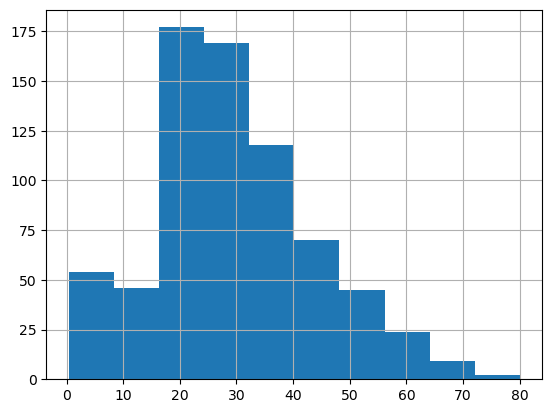

In [399]:
df['Age'].hist()


In [400]:
df['Age'].mean()

29.69911764705882

In [401]:
df['Age'].median()

28.0

In [402]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

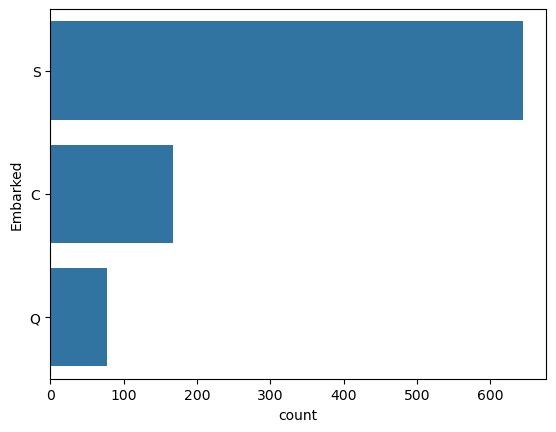

In [403]:
sns.countplot(data=df['Embarked'])

In [404]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [405]:
df['Embarked'].fillna('S',inplace=True)

In [406]:
df = df.drop('Cabin',axis=1)

In [407]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [408]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [409]:
df['YalnizSeyahat'] = np.where((df["SibSp"] + df["Parch"]) > 0, 0, 1)

In [410]:
df.drop('SibSp', axis=1, inplace=True)

df.drop('Parch', axis=1, inplace=True)

In [411]:
df = pd.get_dummies(data=df, columns=['Embarked', 'Sex', 'Pclass'], drop_first=True, dtype=np.int32)

In [412]:
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,YalnizSeyahat,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,1,0,1


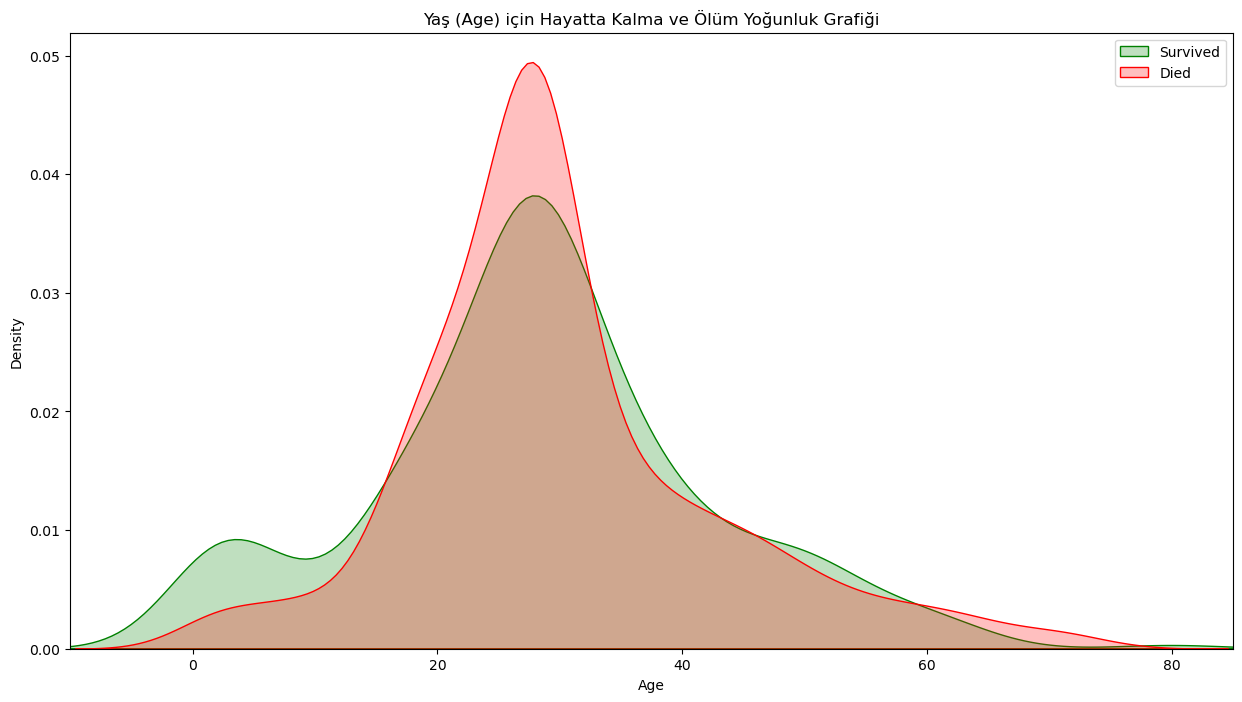

In [413]:
plt.figure(figsize=(15,8))

# Hayatta kalanlar -> Survived == 1
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="green", shade=True)

# Ölenler -> Survived == 0
sns.kdeplot(df["Age"][df.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Yaş (Age) için Hayatta Kalma ve Ölüm Yoğunluk Grafiği')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


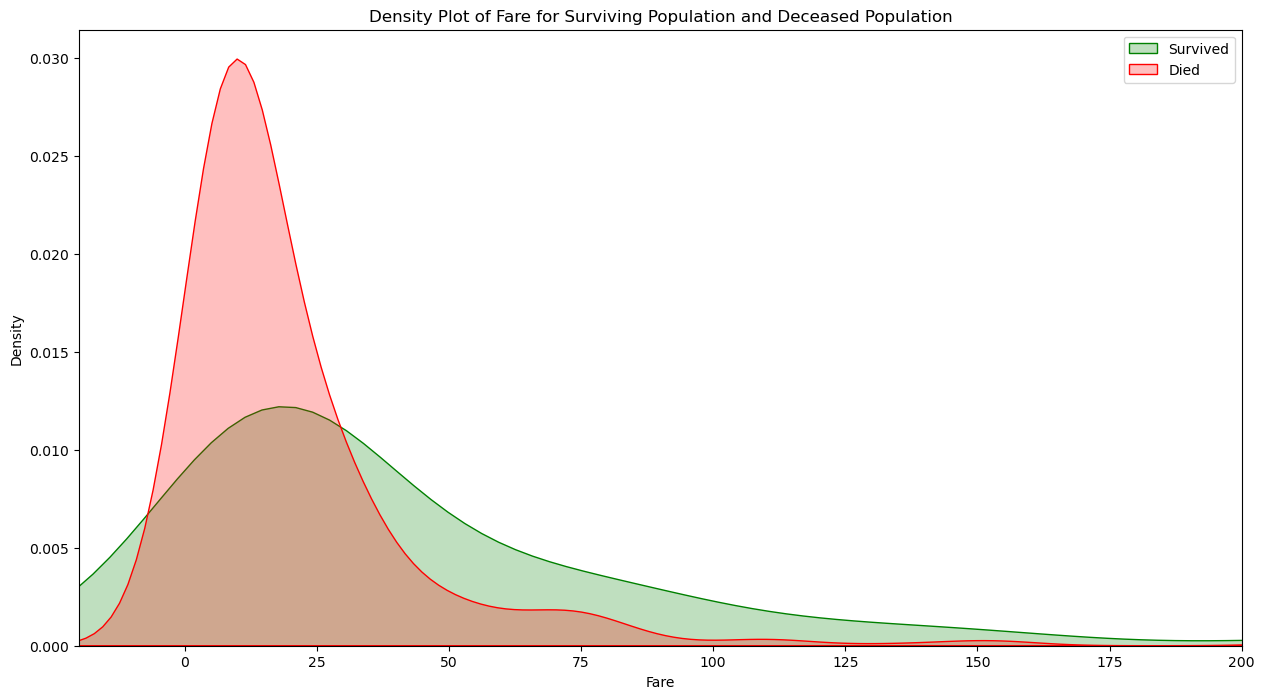

In [414]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="green", shade=True)

sns.kdeplot(df["Fare"][df.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

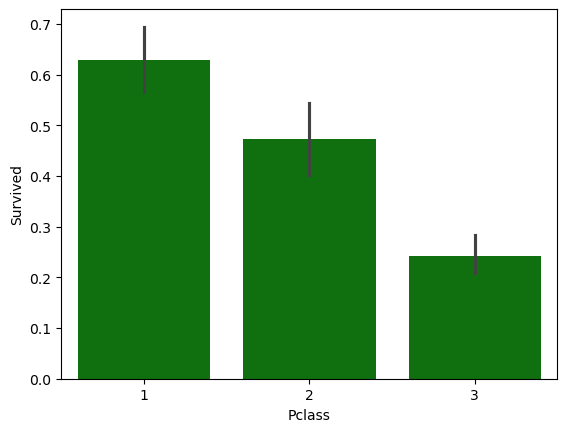

In [415]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color="green")

plt.show()

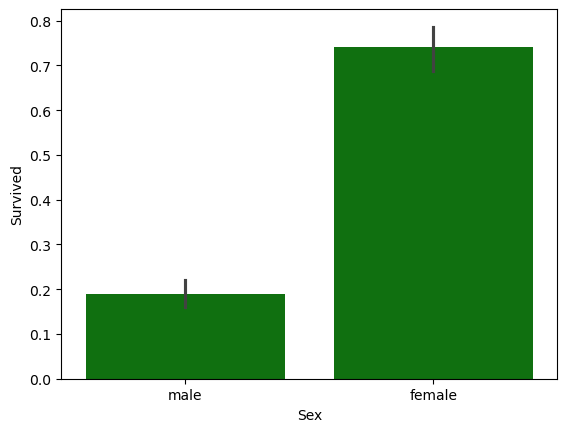

In [416]:
sns.barplot(x='Sex', y='Survived', data=train_df, color="green")

plt.show()


In [425]:
X = df.drop('Survived',axis=1)
y = df['Survived']


In [427]:
X.columns

Index(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'YalnizSeyahat',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [429]:
cols = [ 'Age', 'Fare', 'YalnizSeyahat','Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_2', 'Pclass_3']

In [431]:
train_x = X[cols]

In [419]:
from sklearn.preprocessing import MinMaxScaler

In [433]:
sc = MinMaxScaler()
train_x = sc.fit_transform(train_x)

In [443]:
train_x = pd.DataFrame(train_x, columns=[cols])

In [445]:
train_x.head()

,Age,Fare,YalnizSeyahat,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0.271174,0.014151,0.0,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.103644,0.0,0.0,1.0,0.0,0.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,1.0,0.0,1.0


In [447]:
from sklearn.model_selection import train_test_split

In [449]:
# datayı artık gerçek olarak train-test şeklinde ayırabiliriz
# test size: %20 olsun

X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.2, random_state=2)

In [451]:
from sklearn.linear_model import LogisticRegression

In [453]:
logreg = LogisticRegression(solver='liblinear',random_state=0)

In [455]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [459]:
y_pred = logreg.predict(X_test)

In [461]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7597765363128491